In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv('C:/Users/VISHU/3D Objects/Machine Learning/Supervised Learning/Regression/train_and_test2.csv')
data.head(4)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1


In [4]:
data = data.dropna()

In [5]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [6]:
data.shape

(1307, 28)

In [7]:
x = data[['Age']]
y = data[['Sex']]
x = x.astype('int32')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [10]:
xtrain.shape

(980, 1)

In [11]:
xtest.shape

(327, 1)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
standardscalar = StandardScaler()
xtrain = standardscalar.fit_transform(xtrain)
xtest = standardscalar.transform(xtest)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logisticregression = LogisticRegression()
xt = np.array(xtrain)
yt = np.array(ytrain)
xt = xt.reshape((980, 1))
yt = yt.reshape((980, 1))
logisticregression.fit(xt, yt)

C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
ypred = logisticregression.predict(xtest)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
print("The Performance of the Logistic Regression : ",accuracy_score(ypred, ytest)*100,"%")

The Performance of the Logistic Regression :  61.16207951070336 %


In [19]:
cm = confusion_matrix(ypred, ytest)
cm

array([[200, 127],
       [  0,   0]], dtype=int64)

In [20]:
xts = np.array(xtest)
yts = np.array(ytest)
yp = np.array(ypred)
xts.shape

(327, 1)

In [21]:
xts1 = np.array([])
yts1 = np.array([])
xts2 = np.array([])
yts2 = np.array([])

In [22]:
for i in range(0, 327):
    if yts[i] == 0:
        xts1 = np.append(xts1, xts[i])
        yts1 = np.append(yts1, yts[i])
    else:
        xts2 = np.append(xts2, xts[i])
        yts2 = np.append(yts2, yts[i])
xts1.shape, xts2.shape

((200,), (127,))

C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


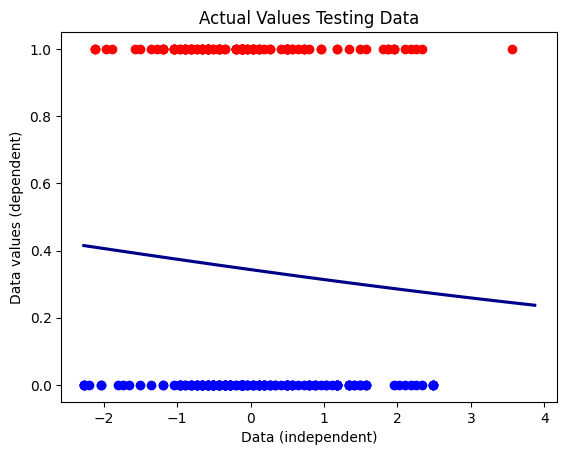

In [23]:
plt.scatter(xts1, yts1, marker='o', color='blue')
plt.scatter(xts2, yts2, marker='o', color='red')
plt.title("Actual Values Testing Data")
plt.xlabel("Data (independent)")
plt.ylabel("Data values (dependent)")
sns.regplot(xt, yt, data=data, ci=None, logistic=True, line_kws={'color':'darkblue'}, scatter_kws={'color':'none'})
plt.show()

In [24]:
xt1 = np.array([])
yp1 = np.array([])
xt2 = np.array([])
yp2 = np.array([])
yp.shape

(327,)

In [25]:
for i in range(0, 327):
    if yp[i] == 0:
        xt1 = np.append(xt1, xts[i])
        yp1 = np.append(yp1, yp[i])
    else:
        xt2 = np.append(xt2, xts[i])
        yp2 = np.append(yp2, yp[i])
xt1.shape, xt2.shape

((327,), (0,))

C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


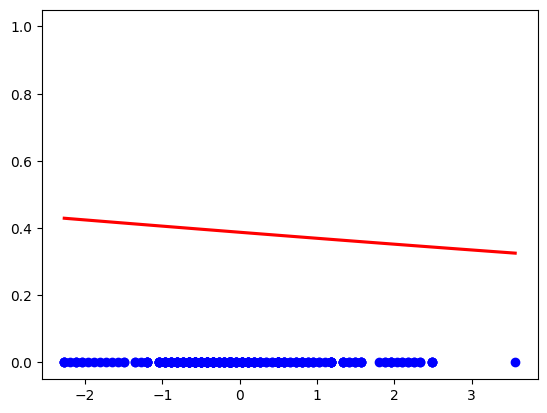

In [26]:
plt.scatter(xt1, yp1, color='blue')
plt.scatter(xt2, yp2, color='red')
sns.regplot(xts, yts, ci=None, logistic=True, line_kws={'color': "red"}, scatter_kws={'color': 'none'})
plt.show()

In [27]:
x = data[['Fare', 'Age']]
y = data[['sibsp']]

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((914, 2), (393, 2), (914, 1), (393, 1))

In [45]:
xtrain = standardscalar.fit_transform(xtrain)
x = standardscalar.fit_transform(x)
xtest = standardscalar.fit_transform(xtest)
xtrain.shape, xtest.shape

((914, 2), (393, 2))

In [46]:
logisticregression.fit(xtrain, ytrain)

C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [47]:
x = np.array(x)
xt11 = x[:, 0:1]
xt11.shape

(1307, 1)

In [48]:
xt11

array([[-0.50183865],
       [ 0.7360229 ],
       [-0.48878987],
       ...,
       [-0.50183865],
       [-0.48637343],
       [-0.20977212]])

In [32]:
ypred = logisticregression.predict(xtest)

In [33]:
print("The Performance of the Algorithm is : ",accuracy_score(ypred, ytest)*100,'%')

The Performance of the Algorithm is :  67.43002544529261 %


In [34]:
cm1 = confusion_matrix(ypred, ytest)

In [35]:
x11 = np.array([])
y11 = np.array([])
y12 = np.array([])
x12 = np.array([])

In [36]:
for i in range(0, 393):
    if ypred[i] == 0:
        x11 = np.append(x11, xtest[i][0] + xtest[i][1])
        y11 = np.append(y11, ypred[i])
    else:
        x12 = np.append(x12, xtest[i][0] + xtest[i][1])
        y12 = np.append(y12, ypred[i])
x11.shape, x12.shape

((378,), (15,))

C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


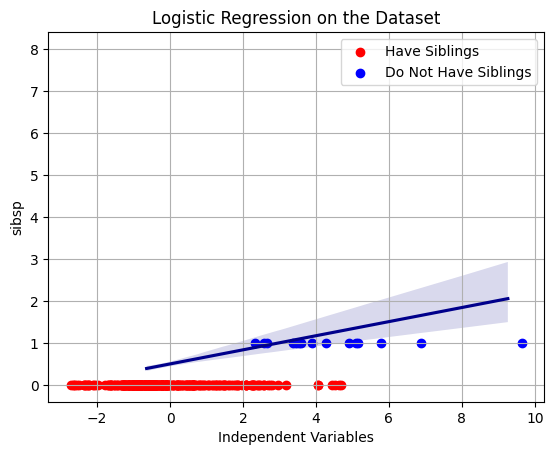

In [50]:
plt.scatter(x11, y11, color='red')
plt.scatter(x12, y12, color='blue')
plt.title("Logistic Regression on the Dataset")
plt.xlabel("Independent Variables")
plt.ylabel("Dependent Variables")
sns.regplot(xt11, y, data=data, line_kws={'color':'darkblue'}, scatter_kws={'color':'none'})
plt.grid(True)
plt.legend(['Have Siblings', 'Do Not Have Siblings'])
plt.show()